In [2]:

import numpy as np;
import pandas as pd;
import operator;
from sklearn.model_selection import train_test_split;
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 

In [2]:
train = pd.read_csv('./Part1_data/dataset_3/spiral.txt',sep='\s+',error_bad_lines=False);

In [3]:
train.columns=['x','y','result']
train

,x,y,result
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3
...,...,...,...
306,15.75,13.85,2
307,15.65,14.05,2
308,15.65,14.25,2
309,15.65,14.50,2


In [4]:
ground_truth=train['result']
new_data=train.drop('result',axis=1)

In [5]:
new_data

,x,y
0,31.15,7.30
1,30.45,6.65
2,29.70,6.00
3,28.90,5.55
4,28.05,5.00
...,...,...
306,15.75,13.85
307,15.65,14.05
308,15.65,14.25
309,15.65,14.50


In [6]:
ground_truth.unique()

array([3, 1, 2])

In [7]:
data=train

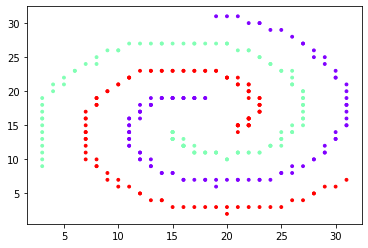

<Figure size 720x720 with 0 Axes>

In [9]:
# Plottting the dataset in diffrent colors
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
data['result']=data['result'].astype(int)
data['x']=data['x'].astype(int)
data['y']=data['y'].astype(int)

ax.scatter(data['x'], data['y'], s=8, c=data['result'], cmap='rainbow')   

In [12]:
#Implementing KNN
def convertToArray(data):
    res = []
    for index in range(len(data)):
        temp = []
        for j in range(len(data.iloc[index])):
            try:
                temp.append(int(data.iloc[index][j]))
            except:
                temp.append(data.iloc[index][j])
        res.append(temp)
    return res

In [13]:
#  Calculating Euclidean Distance
def euclidean_distance(x1, x2, length):
    distance = 0
    for x in range(length):
        distance += np.square(x1[x] - x2[x])
    return np.sqrt(distance)

#  K-Nearest Neighbour model
def knn_main(training_data, testquery, k):
    distances = {}
    length = len(testquery)
    for x in range(len(training_data)):
        dist = euclidean_distance(testquery, training_data[x], length)
        distances[x] = dist
    sortdist = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(sortdist[x][0])
    Count = {}  
    for x in range(len(neighbors)):
        response = training_data[neighbors[x]][-1]
        if response in Count:
            Count[response] += 1
        else:
            Count[response] = 1
    best_values = sorted(Count.items(), key=operator.itemgetter(1), reverse=True)
    return (best_values[0][0])




In [14]:
# Calculate accuracy percentage
def accuracy_measure(truth, pred):
    sum = 0
    for i in range(len(truth)):
        if truth[i] == pred[i]:
            sum += 1
    return sum / float(len(truth)) * 100.0

def evaluate(train_set,test_set, algorithm, k):
    new_train_set=convertToArray(train_set)
    new_test_set=convertToArray(test_set)  
    predicted_results = []
    for index in range(len(new_test_set)):
        predicted_results.append(algorithm(new_train_set, new_test_set[index], k))
    actual = [row[-1] for row in new_test_set]
    accuracy = accuracy_measure(actual, predicted_results)
    return (accuracy)

In [16]:
#Splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(new_data,ground_truth, random_state = 0) 
train_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

In [19]:
# Calculating Accuracy of the model
a=evaluate(train_set, test_set,knn_main, 5);
print('Accuracy using numpy --',a)

Accuracy using numpy -- 100.0


In [20]:
# KNN implementing using sklearn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)  

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print('Accuracy using sklearn --',accuracy*100)

Accuracy using sklearn -- 100.0


Text(0.5, 0, 'x')

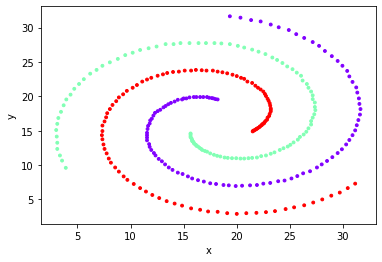

<Figure size 720x720 with 0 Axes>

In [21]:
# Plotting the predicted dataset 
new_data=pd.concat([X_test,y_test],axis=1)
new_data=pd.concat([new_data,pd.concat([X_train,y_train],axis=1)])
new_data['x']=new_data['x'].astype(float)
new_data['y']=new_data['y'].astype(float)
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(new_data['x'], new_data['y'], s=8, c=new_data['result'], cmap='rainbow')    
ax.set_ylabel('y')
ax.set_xlabel('x')

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, knn_predictions) 
print(cm)

[[22  0  0]
 [ 0 27  0]
 [ 0  0 29]]


Accurcay of both the algorithms implented using numpy as well as sklearn gives the same accuracy 100% which is quite good. The clusters are evenly divided with no overlapping of boundaries. The graph observed before and after the prediction is quite similar as our model is able to correctly all the values .

In [ ]:
# Implementing K-Means
feature_1=train['x'].astype(np.float);
feature_2=train['y'].astype(np.float);
features = np.array(list(zip(feature_1, feature_2)))

# Calculating  Distance  between two points
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 15

# X and Y coordinates of random centroids
C_x = np.random.randint(0, np.max(features), size=k)
C_y = np.random.randint(0, np.max(features), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
             
#Implementing K means using numpy
from copy import deepcopy
C_old = np.zeros(C.shape)
clusters = np.zeros(len(features))

# Calculating Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Minimizing till the error is zero
while error != 0:
   
    for i in range(len(features)):
        distances = dist(features[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(C)
    
    # Calculating the new centroids by taking the average value
    for i in range(k):
        points = [features[j] for j in range(len(features)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

#Centroids              
C             

/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#Plotting graph
colors = ['m', 'g','k','lightgrey','brown','r','coral','chocolate','darkorange','y','c','b','m','pink','slategrey']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([features[j] for j in range(len(features)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i]) 
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
#Implementing using sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15)
kmeans = kmeans.fit(features)
labels = kmeans.predict(features)

centroids_using_sklearn = kmeans.cluster_centers_
print(centroids_using_sklearn)

In [ ]:
#Plotting the graph with Centroid of K-Means
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], s=7, c=labels, cmap='rainbow')        
ax.scatter(centroids_using_sklearn[:, 0], centroids_using_sklearn[:, 1], marker='*', s=200, c='#050505')

In [ ]:
#V_measure Score
from sklearn.metrics import v_measure_score 
v_measure_score(new_data['result'], labels)

# Movie Recommendation

In [3]:
#Loading the dataset
rating_data = pd.io.parsers.read_csv('ml-1m/ratings.dat', 
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')
movie_data = pd.io.parsers.read_csv('ml-1m/movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::')

In [4]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [9]:
#Calculating the rating matrices
ratings_mat = np.ndarray(
    shape=(np.max(rating_data.movie_id.values), np.max(rating_data.user_id.values)),
    dtype=np.uint8)
ratings_mat[rating_data.movie_id.values-1, rating_data.user_id.values-1] = rating_data.rating.values

In [10]:
ratings_mat

array([[5, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
#Normalization
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T
normalised_mat

array([[ 3.57400662, -1.42599338, -1.42599338, ..., -1.42599338,
        -1.42599338,  1.57400662],
       [-0.37152318, -0.37152318, -0.37152318, ..., -0.37152318,
        -0.37152318, -0.37152318],
       [-0.23874172, -0.23874172, -0.23874172, ..., -0.23874172,
        -0.23874172, -0.23874172],
       ...,
       [-0.03278146, -0.03278146, -0.03278146, ..., -0.03278146,
        -0.03278146, -0.03278146],
       [-0.02582781, -0.02582781, -0.02582781, ..., -0.02582781,
        -0.02582781, -0.02582781],
       [-0.24288079, -0.24288079, -0.24288079, ..., -0.24288079,
        -0.24288079, -0.24288079]])

In [12]:
#Calculating U, S, V with the help of SVD
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [13]:
# Defining Cos similarity
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

In [14]:
# Function for printing similar movie
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

In [15]:
#Predicting 3 movies
k = 50
movie_id = 1 # Grab an id from movies.dat
top_n = 10

sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for Toy Story (1995): 

Toy Story (1995)
Toy Story 2 (1999)
Babe (1995)
Bug's Life, A (1998)
Pleasantville (1998)
Babe: Pig in the City (1998)
Aladdin (1992)
Stuart Little (1999)
Secret Garden, The (1993)
Tarzan (1999)


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [23]:
movie_id=67
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for Two Bits (1995): 

Two Bits (1995)
Zero Kelvin (Kj�rlighetens kj�tere) (1995)
Taffin (1988)
It Happened Here (1961)
Broken English (1996)
Enfer, L' (1994)
Hav Plenty (1997)
Shopping (1994)
301, 302 (1995)
Wisdom of Crocodiles, The (a.k.a. Immortality) (2000)


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [22]:
movie_id=34
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for Babe (1995): 

Babe (1995)
Toy Story 2 (1999)
Babe: Pig in the City (1998)
Toy Story (1995)
Secret Garden, The (1993)
Madeline (1998)
Bug's Life, A (1998)
Stuart Little (1999)
Matilda (1996)
101 Dalmatians (1996)


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
